# Employee Risk Prediction

# Importing Libraries and dataset

In [1]:
import numpy as np
import pandas as pd 
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("data_infection.csv")

In [13]:
df.head()

,Employee id,Company's Location,Age,Gender,Residence,Commute mode,Shift,Office Structure,Travel history(in past 30 days),Current Disease,Current infected,Previously infected,Dependent(Senior Citizen/Infant),Dependent's disease,Dependent infected currently,Vaccine Status,Fitness Level,Infection Rate
0,12001,10022,52,Female,11001,Private,General,Cabin,No,Yes,No,No,Yes,Yes,No,No,Unfit,11.37
1,12002,10022,24,Male,14445,Private,General,Cubical,No,Yes,No,Yes,Yes,Yes,Yes,No,Unfit,12.92
2,12003,10022,40,Male,12923,Private,General,Cubical,No,No,No,Yes,Yes,Yes,No,No,Fit,33.81
3,12004,10022,56,Male,14847,Public,General,Cubical,No,Yes,No,No,No,No,No,No,Unfit,25.10
4,12005,10022,46,Female,11776,Public,General,Cubical,No,Yes,No,No,Yes,No,No,Yes,Unfit,12.78


# Data pre-processing

In [372]:
df.columns

Index(['Employee id', 'Company's Location', 'Age', 'Gender', 'Residence',
       'Commute mode', 'Shift', 'Office Structure',
       'Travel history(in past 30 days)', 'Current Disease',
       'Current infected', 'Previously infected',
       'Dependent(Senior Citizen/Infant)', 'Dependent's disease',
       'Dependent infected currently', 'Vaccine Status', 'Fitness Level',
       'Infection rate'],
      dtype='object')

In [373]:
df.dtypes

Employee id                           int64
Company's Location                    int64
Age                                   int64
Gender                               object
Residence                             int64
Commute mode                         object
Shift                                object
Office Structure                     object
Travel history(in past 30 days)      object
Current Disease                      object
Current infected                     object
Previously infected                  object
Dependent(Senior Citizen/Infant)     object
Dependent's disease                  object
Dependent infected currently         object
Vaccine Status                       object
Fitness Level                        object
Infection rate                      float64
dtype: object

In [374]:
df.describe()

,Employee id,Company's Location,Age,Residence,Infection rate
count,1000.000000,1000.0,1000.000000,1000.000000,1000.000000
mean,12500.500000,10022.0,39.908000,12759.287000,12.838230
std,288.819436,0.0,12.090646,1367.383813,5.074593
min,12001.000000,10022.0,20.000000,10003.000000,5.270000
25%,12250.750000,10022.0,29.000000,11782.000000,9.050000
50%,12500.500000,10022.0,40.000000,12861.500000,12.150000
75%,12750.250000,10022.0,51.000000,13841.500000,16.470000
max,13000.000000,10022.0,60.000000,14902.000000,28.490000


# Data Cleaning

In [375]:
#Check null values in dataset
df.isnull().sum()

Employee id                         0
Company's Location                  0
Age                                 0
Gender                              0
Residence                           0
Commute mode                        0
Shift                               0
Office Structure                    0
Travel history(in past 30 days)     0
Current Disease                     0
Current infected                    0
Previously infected                 0
Dependent(Senior Citizen/Infant)    0
Dependent's disease                 0
Dependent infected currently        0
Vaccine Status                      0
Fitness Level                       0
Infection rate                      0
dtype: int64



 > **Error handling**



In [376]:
#Define customize exception class
class duplicateID(Exception):
     pass
class invalidAge(Exception):
     pass
class invalidResidence(Exception):
     pass
class invalidDatatype(Exception):
     pass

1. **Handle duplicate Employee id**




In [377]:
try:
  if not df["Employee id"].duplicated().any():
    pass
  else:
    #remove duplicate employee id(just keep one)
    duplicate_index=df.index[df["Employee id"].duplicated(keep=False)]
    df=df.drop_duplicates(subset='Employee id', keep="last")
    raise duplicateID(Exception)
except duplicateId:
  emp_id=list(map(lambda x: x + 12001, duplicate_index))
  print("These employees have filled duplicate employee id")
  print(emp_id)

2. **Handle invalid Age error(Age should be greater than 18)**



In [378]:
try:
    if df[df.Age>18]["Age"].all():
      pass
    else:
      invalid_age_index=df.index[df.Age<=18]
      df=df.drop(invalid_age_index)
      raise invalidAge

except invalidAge:
  emp_id=list(map(lambda x: x + 12001, invalid_age_index))
  print("These employees have filled their age wrong")
  print(emp_id)

3. **Handle invalid Residence error(Residence should be within range)**


In [379]:
try:
  r = list(range(10000,15000)) 
    
  id=[]
  for i in range(len(df)):
   if df.Residence[i] in r:
     pass
   else:
     for i in range(len(df)):
       if df.Residence[i] not in r:
         id.append(i)
     df=df.drop(id)
     raise invalidResidence

except invalidResidence:
  emp_id=list(map(lambda x: x + 12001, id))
  print("These employees have filled their residence out of range ")
  print(emp_id)

4. **Handle invalid objects in specific datatype columns**

In [380]:
#for numeric columns
numeric_col=["Employee id","Company's Location","Age","Residence","Infection rate"]
try:
    df_col=df.select_dtypes(include=np.number).columns.tolist()
    if df_col==numeric_col:
      pass
    else:
      cols=[x for x in numeric_col if x not in df_col]#non_numeric col
      for cols in cols:
        invalid_index=df.index[df[cols].apply(lambda x: isinstance(x, str))].values.tolist()
        df=df.drop(invalid_index)
        raise invalidDatatype

except invalidDatatype:
  emp_id=list(map(lambda x: x + 12001, invalid_index))
  print("These employees have filled invalid data in ",cols,"column")
  print(emp_id)

In [381]:
# for non numeric columns
non_numeric_col=['Gender', 'Commute mode', 'Shift', 'Office Structure',
       'Travel history(in past 30 days)', 'Current Disease',
       'Current infected', 'Previously infected',
       'Dependent(Senior Citizen/Infant)', "Dependent's disease",
       'Dependent infected currently', 'Vaccine Status', 'Fitness Level']
try:
    df_col=df.select_dtypes(exclude=np.number).columns.tolist()
    if df_col==non_numeric_col:
      pass
    else:
      cols=[x for x in non_numeric_col if x not in df_col]#numeric col
      for cols in cols:
        invalid_index=df.index[df[cols].apply(lambda x: isinstance(x, int))].values.tolist()
        df=df.drop(invalid_index)
        raise invalidDatatype

except invalidDatatype:
  emp_id=list(map(lambda x: x + 12001, invalid_index))
  print("These employees have filled invalid data in ",cols,"column")
  print(emp_id)



> <b>Handling missing value</b>



In [382]:
#should be removed if null, can't assign random prediction
col=['Employee id', 'Current Disease', 'Travel history(in past 30 days)','Current infected', 'Previously infected', "Dependent's disease", 'Dependent infected currently',"Vaccine Status"]
index_col=[]

for cols in col: 
    index_col.append(df[cols].index[df[cols].isna().values.tolist()])#must store null value index for future error generation
    df=df.dropna(subset=[cols])
    

Note:Must store the index of null values of [employee id, current disease, vaccine date, travel history, current infected, previously infected, dependent's disease, dependent infected, vaccine date ]and these indexes should be dropped from the dataset.

In [383]:
#unique column
df["Company's Location"].fillna(10022,inplace = True)

In [384]:
#Age column
mean_age_seat = df.groupby("Office Structure", as_index=False).Age.mean()

nan_index = df['Age'].index[df['Age'].isna()]
for i in nan_index:

    if (df["Office Structure"][i] == "nan"):

        age = mean_age_seat.loc[mean_age_seat["Office Structure"] ==
                                df["Office Structure"][i]].values[0]
        df["Age"][i] = int(age[1])

    else:
        df["Age"][i] = int(df["Age"].mean())

In [385]:
#Gender column
nan_index=df['Gender'].index[df['Gender'].isna()]
for i in nan_index:
    df["Gender"][i]=random.choice(["Female","Male"], p=[0.48,0.52])

In [386]:
#Residence column
nan_index=df['Residence'].index[df['Residence'].isna()]
for i in nan_index:
    x = random.randint(10000,15000)
    df["Residence"][i]=random.choice([10022,x], p=[0.9,0.1])#most residence should match office location

In [387]:
#Commute mode column
nan_index=df['Commute mode'].index[df['Commute mode'].isna()]
for i in nan_index:
    seating=df["Office Structure"][i]#commute mode generally depends upon office type of an employee
    if seating=="Cabin":
        df["Commute mode"][i]="Private"
    else:
        df["Commute mode"][i]=random.choice(["Private","Public"], p=[0.3,0.7])

In [388]:
#Shift column
nan_index = df['Shift'].index[df['Shift'].isna()]
for i in nan_index:
    df["Shift"][i] = random.choice(["General", "Night"], p=[0.9, 0.1])

In [389]:
#Office structure column
nan_index = df['Office Structure'].index[df['Office Structure'].isna()]
for i in nan_index:
    age = df["Age"][i]
    if age > 40:
        df["Office Structure"][i] = "Cabin"
    else:
        df["Office Structure"][i] = random.choice(
            ["Cubical", "Cabin", "Continous Desk"], p=[0.5, 0.1, 0.4])

In [390]:
#Dependent(Senior Citizen/Infant) column
nan_index = df["Dependent(Senior Citizen/Infant)"].index[
    df["Dependent(Senior Citizen/Infant)"].isna()]
for i in nan_index:
    if df["Gender"][i] == "Female":
        if (df["Age"][i] >= 26) & (df["Age"][i] <= 40):
            df["Dependent(Senior Citizen/Infant)"][i] = "Yes"
        else:
            df["Dependent(Senior Citizen/Infant)"][i] = random.choice(
                ["Yes", "No"], p=[0.1, 0.9])

    elif df["Gender"][i] == "Male":
        if (df["Age"][i] >= 30) & (df["Age"][i] <= 44):
            df["Dependent(Senior Citizen/Infant)"][i] = "Yes"
        else:
            df["Dependent(Senior Citizen/Infant)"][i] = random.choice(
                ["Yes", "No"], p=[0.1, 0.9])

    else:
        df["Dependent(Senior Citizen/Infant)"][i] = "No"

In [391]:
#17 Fitness column
df["Fitness Level"].replace(np.nan,df["Fitness Level"].mode()[0],inplace = True)



> **employees whose risk can't be calculated**



In [392]:
column_name = []
mylists = []
base_id = 12001
k = 0

for colm in index_col:
    mylists = mylists + colm.values.tolist()

id = list(map(lambda x: x + base_id, mylists))

name = [
    "Employee id", "Travel history(in past 30 days)", "Current Disease",
    "Current infected", "Previously infected", "Dependent infected",
    "Dependent's disease","Vaccine Status"]

for colm in index_col:
    for i in range(len(colm)):
        column_name.append(name[k])
    k += 1

In [393]:
data=pd.DataFrame(list(zip(id,column_name)), 
               columns =["Employee id",'Incomplete column'])
data

,Employee id,Incomplete column


# Grouping numerical data

**Zone wise clustering**

In [394]:
#Clustering based on infection rate in employee's residence
#!pip install kmeans1d
import kmeans1d

x=df.iloc[:,17].values
k = 3

clusters, centroids = kmeans1d.cluster(x, k)

print(clusters)   
print(centroids)

[1, 0, 0, 2, 0, 1, 1, 2, 1, 2, 0, 0, 1, 2, 2, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 1, 1, 2, 2, 1, 0, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 1, 0, 2, 2, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 

In [395]:
df["Zone"]=clusters

def zone(cluster):
    if cluster==0:
      return "Green"
    elif cluster==1:
      return "Yellow"
    if cluster==2:
      return "Red"
df["Zone"]=df["Zone"].apply(zone)


In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1610453712071' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;in&#47;infectionzone&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='infectionzone&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;in&#47;infectionzone&#47;Sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1610453712071');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**Age wise grouping**

In [397]:
def age(param):
    if param <=35 and param >=20:
        return '20-35'
    elif param >35 and param<=50:
        return '36-50'
    else:
      return "50+"
    
df['Age-group'] = df['Age'].apply(age)

# Risk Score

In [398]:
def score(df,Score):
    if df["Dependent infected currently"]=="No":
        Score=Score-10
    if df["Current Disease"]=="No":
        Score=Score-9

    if df["Age-group"]=="20-35":
        Score=Score-8
    if df["Age-group"]=="36-50":
        Score=Score-5
    if df["Fitness Level"]=="Fit":
        Score=Score-8
    if df["Travel history(in past 30 days)"]=="No":
        Score=Score-8
    if df["Zone"]=="Yellow":
        Score=Score-4
    if df["Zone"]=="Green":
        Score=Score-6
    if df["Commute mode"]=="Private":
        Score=Score-5
    if df["Vaccine Status"]=="Yes":
        Score=Score-9
    if df["Dependent's disease"]=="No":
        Score=Score-3
    if df["Office Structure"]=="Cabin":
        Score=Score-2
    if df["Office Structure"]=="Cubical":
        Score=Score-1
    if df["Dependent(Senior Citizen/Infant)"]=="No":
        Score=Score-2
    if df["Previously infected"]=="Yes":
        Score=Score-2
    if df["Gender"]=="No":
        Score=Score-1
    if df["Shift"]=="No":
        Score=Score-2
        
    return Score

In [399]:
risk_score=[]
for i in range(len(df)):
  risk_score.append(score(df.iloc[i],100))
df["Risk_Score"]=risk_score
df.head()

,Employee id,Company's Location,Age,Gender,Residence,Commute mode,Shift,Office Structure,Travel history(in past 30 days),Current Disease,Current infected,Previously infected,Dependent(Senior Citizen/Infant),Dependent's disease,Dependent infected currently,Vaccine Status,Fitness Level,Infection rate,Zone,Age-group,Risk_Score
0,12001,10022,52,Female,13843,Private,General,Continous Desk,No,Yes,No,No,No,No,No,No,Fit,16.47,Yellow,50+,60
1,12002,10022,44,Male,10987,Public,General,Cabin,No,Yes,No,No,No,No,Yes,Yes,Unfit,6.36,Green,36-50,65
2,12003,10022,37,Male,12592,Public,General,Cubical,No,No,Yes,No,Yes,Yes,No,Yes,Unfit,10.36,Green,36-50,52
3,12004,10022,57,Female,13678,Public,General,Cabin,Yes,Yes,No,No,Yes,Yes,No,No,Fit,17.56,Red,50+,80
4,12005,10022,46,Male,11004,Private,General,Continous Desk,No,Yes,No,Yes,Yes,Yes,No,Yes,Fit,7.57,Green,36-50,47


In [400]:
stat=df["Risk_Score"].describe()
stat

count    1000.000000
mean       57.554000
std        10.524536
min        32.000000
25%        50.000000
50%        57.000000
75%        65.000000
max        94.000000
Name: Risk_Score, dtype: float64

# Feature Scaling

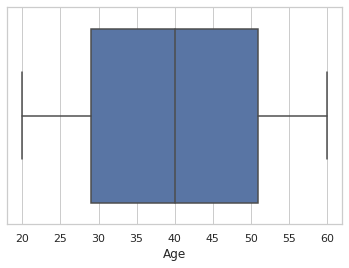

In [401]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Age"])
plt.show()

In [402]:
df1=df.copy()
#Scale Age and infection rate between 0-1
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
df1["Age"]= sc.fit_transform(df1["Age"].values.reshape(-1,1))
df1["Infection rate"]= sc.fit_transform(df1["Infection rate"].values.reshape(-1,1))

# Label Encoding

In [403]:
col=list(df1.select_dtypes(include=['object']).columns)

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
for cols in col:
    i=df1.columns.get_loc(cols)
    df1.iloc[:,i] = labelencoder_X.fit_transform(df1.iloc[:,i])

df1=pd.get_dummies(df1,columns=["Office Structure"])
df1=df1.drop(['Office Structure_2'],axis=1)


In [404]:
df1.head()

,Employee id,Company's Location,Age,Gender,Residence,Commute mode,Shift,Travel history(in past 30 days),Current Disease,Current infected,Previously infected,Dependent(Senior Citizen/Infant),Dependent's disease,Dependent infected currently,Vaccine Status,Fitness Level,Infection rate,Zone,Age-group,Risk_Score,Office Structure_0,Office Structure_1
0,12001,10022,0.800,0,13843,0,0,0,1,0,0,0,0,0,0,0,0.482343,2,2,60,0,1
1,12002,10022,0.600,1,10987,1,0,0,1,0,0,0,0,1,1,1,0.046942,0,1,65,1,0
2,12003,10022,0.425,1,12592,1,0,0,0,1,0,1,1,0,1,1,0.219208,0,1,52,0,0
3,12004,10022,0.925,0,13678,1,0,1,1,0,0,1,1,0,0,0,0.529285,1,2,80,1,0
4,12005,10022,0.650,1,11004,0,0,0,1,0,1,1,1,0,1,0,0.099053,0,1,47,0,1


# Features Correlation

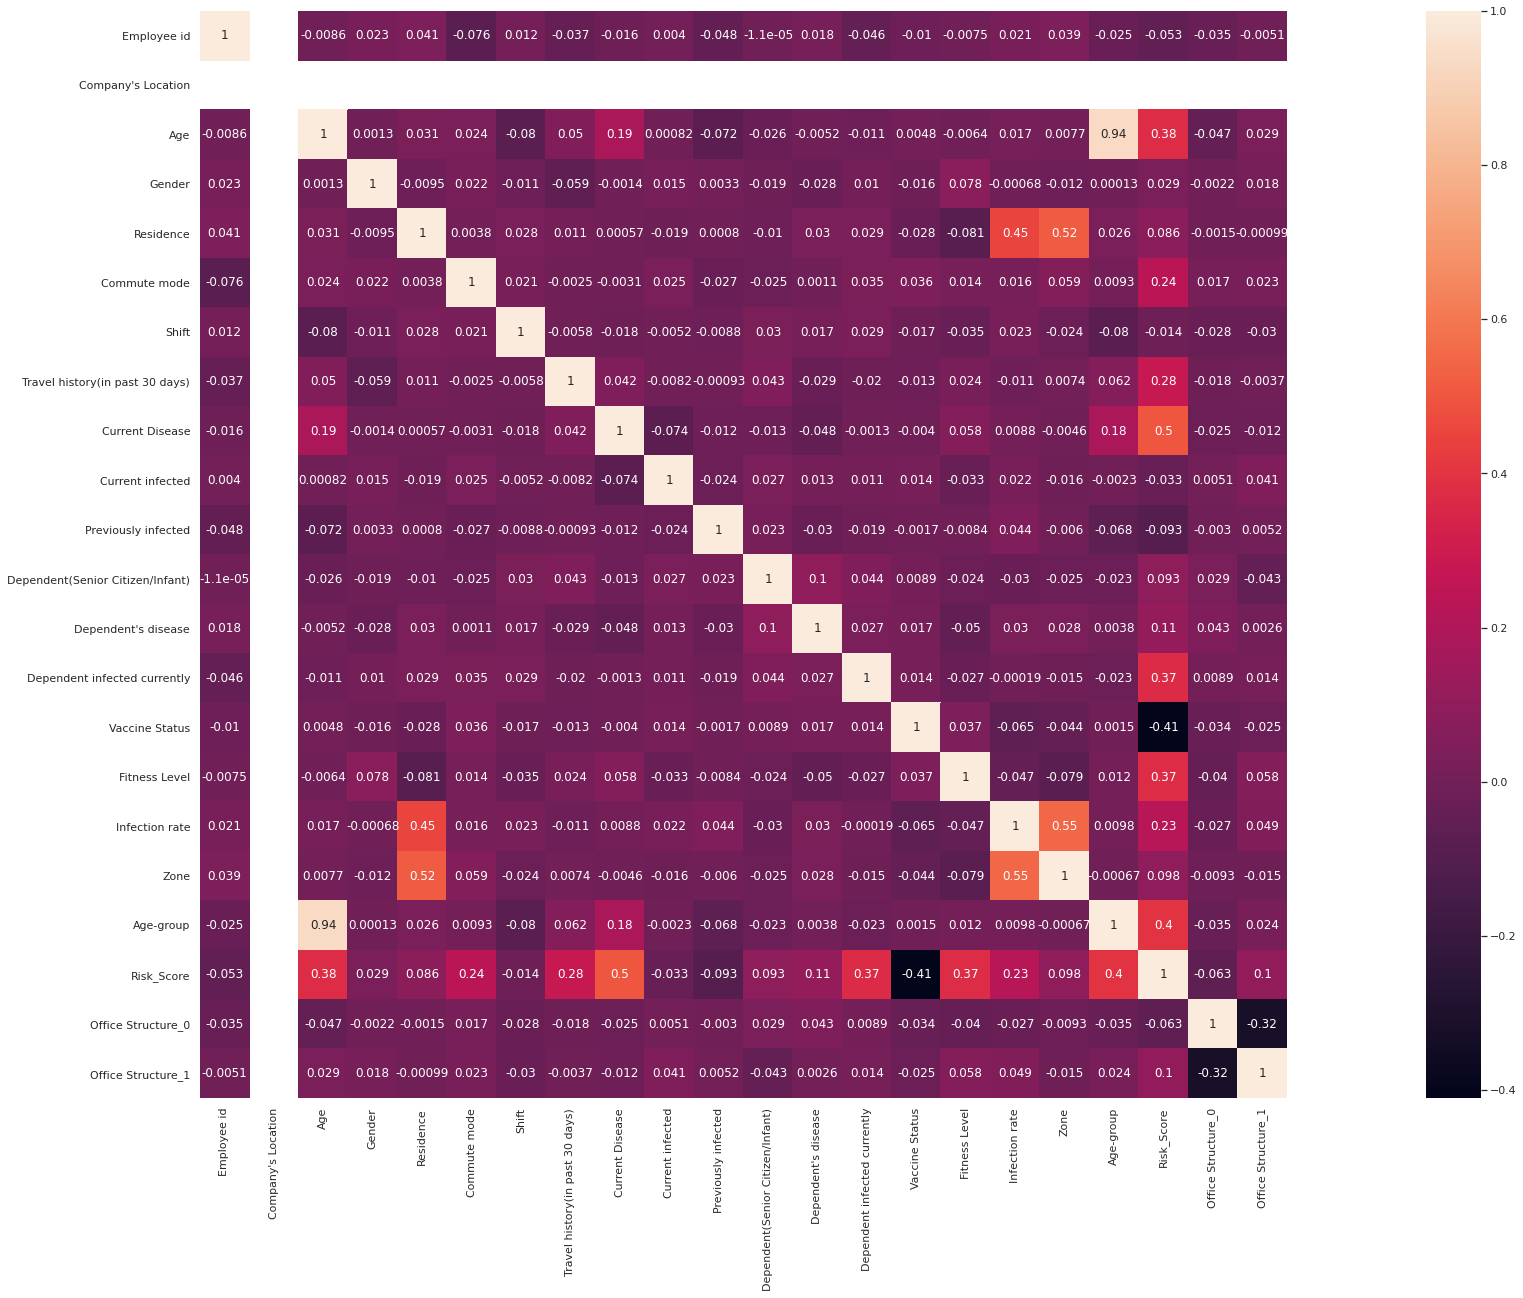

In [405]:
plt.figure(figsize = (50,20))
sns.heatmap(df1.corr(),annot = True,square = True);

# Machine Lerning Model

In [406]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [407]:
#Not important in training the model
df1 = df1.drop(['Employee id','Company\'s Location','Residence', 'Current infected','Age-group','Zone'], axis=1)

In [408]:
#Split into features and label
y = df1['Risk_Score']
X = df1.drop(['Risk_Score'], axis=1)

In [409]:
#train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [410]:
name = []
Scores = []
rmse = []



1. **Multiple linear regression**



In [411]:
reg = LinearRegression() 
   
reg.fit(X_train, y_train) 
y_pred = reg.predict(X_test)

In [412]:
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred)
print("R2 score: {}".format(r2_score(y_test, y_pred)))

R2 score: 0.9731707034675933


In [413]:
from sklearn.metrics import mean_squared_error
mul_mse = mean_squared_error(y_test, y_pred)
mul_rmse = np.sqrt(mul_mse)
mul_rmse

1.6693038666436657

In [414]:
name.append('Multiple Linear Regression')
Scores.append(score)
rmse.append(mul_rmse)



2. **Decision Tree Regression**



In [415]:
decision_model = DecisionTreeRegressor()
decision_model.fit(X_train, y_train)
predicted_decision_trees = decision_model.predict(X_test)
d_error=mean_absolute_error(y_test, predicted_decision_trees)
print ("Mean Absolute Error using Decision Tress :", d_error)
d_score=decision_model.score(X_test, y_test)
print(d_score)

Mean Absolute Error using Decision Tress : 3.42
0.7933177886629459


In [416]:
name.append('Decision Tree Regression')
Scores.append(d_score)
rmse.append(d_error)



3. **Random Forest Tree regression**



In [417]:
forest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
forest_model.fit(X_train, y_train)
predicted_random_forest = forest_model.predict(X_test)
r_error=mean_absolute_error(y_test, predicted_random_forest)
print("Mean Absolute Error using Random Forest:",r_error )
r_score=forest_model.score(X_test, y_test)
print(r_score)

Mean Absolute Error using Random Forest: 2.394704335406023
0.9091213144392323


In [418]:
name.append('Random ForestTree Regression')
Scores.append(r_score)
rmse.append(r_error)

4.  **XGBOOST regression**

In [419]:
xg_model = XGBRegressor(n_estimators=100)
xg_model.fit(X_train, y_train)
predicted_XGBoost = xg_model.predict(X_test)
xg_error=mean_absolute_error(y_test, predicted_XGBoost)
print("Mean Absolute Error using XGBoost: ", xg_error )

xg_score=xg_model.score(X_test, y_test)
print(xg_score)

[10:25:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error using XGBoost:  0.8837360127766927
0.987036965976203


In [420]:
name.append('XGBOOST Regression')
Scores.append(xg_score)
rmse.append(xg_error)

**Summary**

In [421]:
df12= pd.DataFrame(Scores,index=name,columns=['Scores'])
df12['RMSE'] = rmse
df12 = df12.reset_index()
df12['Model'] = df12['index']

In [422]:
df12.drop('index',axis=1,inplace=True)
df12

,Scores,RMSE,Model
0,0.973171,1.669304,Multiple Linear Regression
1,0.793318,3.420000,Decision Tree Regression
2,0.909121,2.394704,Random ForestTree Regression
3,0.987037,0.883736,XGBOOST Regression


**Conclusion**

we discover "XGBOOST regression" algorithm works better for this specific dataset due to least log loss and highest accuracy

# Hyperparameter tuning

In [423]:
from sklearn.model_selection import RandomizedSearchCV
m_dep = [5,6,7,8]
gammas = [0.01,0.001,0.001]
min_c_wt = [1,5,10]
l_rate = [0.05,0.1, 0.2, 0.3]
n_est = [5,10,20,100]

param_grid = {'n_estimators': n_est, 'gamma': gammas, 'max_depth': m_dep,
              'min_child_weight': min_c_wt, 'learning_rate': l_rate}

xgb_cv_10 = RandomizedSearchCV(estimator = xg_model, n_iter=100, param_distributions =  param_grid, random_state=51, cv=5, n_jobs=-1, refit=True)
xgb_cv_10.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",xgb_cv_10.best_params_)
print("accuracy :",xgb_cv_10.best_score_)
print(xgb_cv_10.best_estimator_)

[10:25:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
tuned hpyerparameters :(best parameters)  {'n_estimators': 100, 'min_child_weight': 10, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.001}
accuracy : 0.9843729766292256
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=10, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [424]:
xg_hyper_model=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=8, min_child_weight=10, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [425]:
xg_hyper_model.fit(X_train, y_train)

[10:25:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.001,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=8, min_child_weight=10, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [426]:
risk= xg_hyper_model.predict(X_test)
risk=[round(x) for x in risk]



> **Summary**



In [427]:
index=X_test.index.values.tolist()
emp_id= list(map(lambda x: x + 12001, index))

data1=pd.DataFrame(list(zip(emp_id,risk)), 
               columns =["Employee id",'Risk Score'])

data1.head()

,Employee id,Risk Score
0,12522,54
1,12738,74
2,12741,71
3,12661,39
4,12412,58


In [428]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(xg_hyper_model, open(filename, 'wb'))

# Recommendation

In [429]:
Infection_data=Infection_data.reset_index(drop=True)

import json

employee_recommendations = []

emp_id = Infection_data["Employee id"].tolist()
emp_score = Infection_data["Risk_Score"].tolist()

for i in range(len(Infection_data)) : 
  
    recommendations = []


    if(Infection_data.loc[i,"Vaccine Status"] == "No"):
        rec = {
        "text":"Get the employee vaccinated",
        "score": 9
        }
        recommendations.append(rec)

    if(Infection_data.loc[i,"Travel history(in past 30 days)"] == "Yes"):
        rec = {
        "text":"Wait 30 days from international travel dates",
        "score": 8
        }
        recommendations.append(rec)

    if(Infection_data.loc[i,"Zone"] == "Red"):
        rec = {
        "text":"Provide accomodation to employee in a zone with low infection rate",
        "score": 6
        }
        recommendations.append(rec)

    if(Infection_data.loc[i,"Commute mode"] == "Public"):
        rec = {
        "text":"Provide the employee with a private vehicle",
        "score": 5
        }
        recommendations.append(rec)

    if(Infection_data.loc[i,"Shift"] == "General"):
        rec = {
        "text":"Call the employee in night shift",
        "score": 2
        }
        recommendations.append(rec)

    if(Infection_data.loc[i,"Dependent(Senior Citizen/Infant)"] == "Yes"):
        rec = {
        "text":"Provide private accomodation to employee",
        "score": 2
        }
        recommendations.append(rec)

    if(Infection_data.loc[i,"Office Structure"] == "Continous Desk"):
        rec = {
        "text":"Shift the employee into a cubical",
        "score": 1
        }
        recommendations.append(rec)

    if(Infection_data.loc[i,"Office Structure"] == "Cubical"):
        rec = {
        "text":"Shift the employee into a cabin",
        "score": 1
        }
        recommendations.append(rec)
        
    
    recs_data = {
        "emp_id": emp_id[i],
        "recommendations": recommendations,
        "emp_score": emp_score[i]
    }
    
    employee_recommendations.append(recs_data)
    
recommendations_data= json.dumps(employee_recommendations)

[{'emp_id': 12001, 'recommendations': ['Get the employee vaccinated.', 'Call the employee in night shift.', 'Shift the employee into a cubical.'], 'score_reduction': [9, 2, 1], 'Risk_score': 60}, {'emp_id': 12002, 'recommendations': ['Provide the employee with a private vehicle.', 'Call the employee in night shift.'], 'score_reduction': [5, 2], 'Risk_score': 65}, {'emp_id': 12003, 'recommendations': ['Provide the employee with a private vehicle.', 'Call the employee in night shift.', 'Provide private accomodation to employee.', 'Shift the employee into a cabin.'], 'score_reduction': [5, 2, 2, 1], 'Risk_score': 52}, {'emp_id': 12004, 'recommendations': ['Get the employee vaccinated.', "Wait 30 days from employee's international travel dates before calling him/her.", 'Provide accomodation to employee in a zone with low infection rate.', 'Provide the employee with a private vehicle.', 'Call the employee in night shift.', 'Provide private accomodation to employee.'], 'score_reduction': [9,



> **Final Analysis**





1. High Risk analysis



age_gender_high=df.groupby(['Age-group', 'Gender']).Risk_Score.apply(lambda x: round(len(x[x > 72.5])/len(x) * 100 , 2))
age_gender_high

In [431]:
commute_shift_high=df.groupby(['Commute mode', 'Shift']).Risk_Score.apply(lambda x: round(len(x[x > 75])/len(x) * 100 , 2))
commute_shift_high

Commute mode  Shift  
Private       General     5.45
              Night       1.43
Public        General    11.21
              Night      11.25
Name: Risk_Score, dtype: float64

In [433]:
office_commute_high=df.groupby(["Office Structure", 'Commute mode']).Risk_Score.apply(lambda x: round(len(x[x > 75])/len(x) * 100 , 2))
office_commute_high

Office Structure  Commute mode
Cabin             Private          1.05
                  Public          12.38
Continous Desk    Private          6.47
                  Public          13.64
Cubical           Private          5.43
                  Public           9.24
Name: Risk_Score, dtype: float64

In [434]:
age_disease_high=df.groupby(['Age-group', 'Current Disease']).Risk_Score.apply(lambda x: round(len(x[x > 75])/len(x) * 100 , 2))
age_disease_high

Age-group  Current Disease
20-35      No                  0.00
           Yes                 7.23
36-50      No                  3.60
           Yes                 9.52
50+        No                  4.35
           Yes                25.16
Name: Risk_Score, dtype: float64

2. Medium Risk Analysis

In [ ]:
age_gender_medium=Infection_data.groupby(['Age-group', 'Gender']).Risk_Score.apply(lambda x: round(len(x[(x>45) & (x< 75)])/len(x) * 100 , 2))

commute_shift_medium=Infection_data.groupby(['Commute mode', 'Shift']).Risk_Score.apply(lambda x: round(len(x[ (x>45) & (x<75)])/len(x) * 100 , 2))

office_commute_medium=Infection_data.groupby(["Office Structure", 'Commute mode']).Risk_Score.apply(lambda x: round(len(x[(x < 75) & (x>45)])/len(x) * 100 , 2))

age_disease_medium=Infection_data.groupby(['Age-group', 'Current Disease']).Risk_Score.apply(lambda x: round(len(x[(x < 75) & (x>45)])/len(x) * 100 , 2))

In [ ]:
print(age_gender_medium)
print(commute_shift_medium)